<a href="https://colab.research.google.com/github/tiandrefreitas/estudos-python/blob/main/pyspark_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
 
# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [3]:
# iniciar uma sessão local e importar dados do Airbnb
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.window import Window as w
sc = SparkSession.builder.master('local[*]').getOrCreate()
 
# download do http para arquivo local
!wget --quiet --show-progress http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-07-15/visualisations/listings.csv
 
# carregar dados do Airbnb
df_spark = sc.read.csv("./listings.csv", inferSchema=True, header=True)
 
# ver algumas informações sobre os tipos de dados de cada coluna
df_spark.printSchema()

listings.csv.3      100%[===================>]   4.49M  8.75MB/s    in 0.5s    
root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: string (nullable = true)
 |-- minimum_nights: string (nullable = true)
 |-- number_of_reviews: string (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- calculated_host_listings_count: double (nullable = true)
 |-- availability_365: integer (nullable = true)



In [4]:
df_spark.show()

+-----+--------------------+-------+--------------------+-------------------+---------------+---------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|   id|                name|host_id|           host_name|neighbourhood_group|  neighbourhood| latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+-----+--------------------+-------+--------------------+-------------------+---------------+---------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|17878|Very Nice 2Br - C...|  68997|            Matthias|               null|     Copacabana|-22.96592|-43.17896|Entire home/apt|  296|             4|              233| 2019-06-30|             2.13|                           1.0|             332|
|25026|Beaut

In [5]:
df_spark.withColumn("name",f.trim(f.col("name"))).show(20,False)

+-----+--------------------------------------------------+-------+------------------------+-------------------+---------------+---------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|id   |name                                              |host_id|host_name               |neighbourhood_group|neighbourhood  |latitude |longitude|room_type      |price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|
+-----+--------------------------------------------------+-------+------------------------+-------------------+---------------+---------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+
|17878|Very Nice 2Br - Copacabana - WiFi                 |68997  |Matthias                |null               |Copacabana     |-22.96592|-43.17896|Entire hom

In [ ]:
!pip install chart_studio
!pip install plotly

In [7]:
df_pd = df_spark.groupby("neighbourhood")\
                .agg(f.sum("availability_365")\
                .alias("availability_365"))\
                .filter(f.col("availability_365").isNotNull())\
                .orderBy("availability_365", ascending=False)\
                .limit(10).toPandas()
print(df_pd)

              neighbourhood  availability_365
0                Copacabana           1704835
1           Barra da Tijuca            704497
2                   Ipanema            551062
3  Recreio dos Bandeirantes            335171
4               Jacarepaguá            334559
5                  Botafogo            304785
6                    Leblon            276433
7              Santa Teresa            256503
8                    Centro            190440
9                  Flamengo            173569


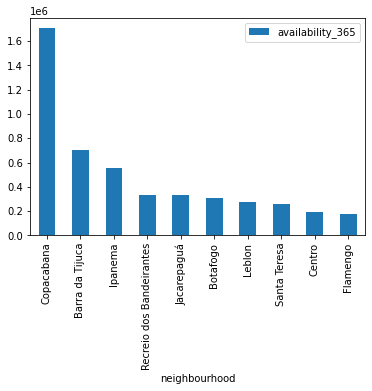

In [22]:
import matplotlib.pyplot as plt

df_pd.plot(x ='neighbourhood', y='availability_365', kind = 'bar')
plt.show()